In this example, a socket connection is made to a remote machine (measurement PC) which is running an instrument server with actual instruments. Experiments are started remotely (the actual experiment process runs on the measurement PC).

A `RemoteExperiment` object is created that has its own data fetching process for live plotting.

In [1]:
import squidpy
%matplotlib nbagg

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
s = squidpy.get_socket(HOST='192.168.84.137', PORT = 50008)

In [3]:
instruments = squidpy.get_instruments(s)

In [4]:
[ins._name for ins in instruments]

['keithleynano', 'currentsource', 'ppms', 'timer']

In [5]:
instruments.keithleynano.nplc = .01

In [6]:
test = squidpy.RemoteExperiment(s, 'my first experiment')
test.sweep('timer.time')[0:600:.2]
test.measure({'timer': ['time'],
              'keithleynano': ['voltage'],
              'ppms': ['temperature', 'field']})
test.run()

In [17]:
test.restart_datacollector() # run this if keyboard interrupt is generated

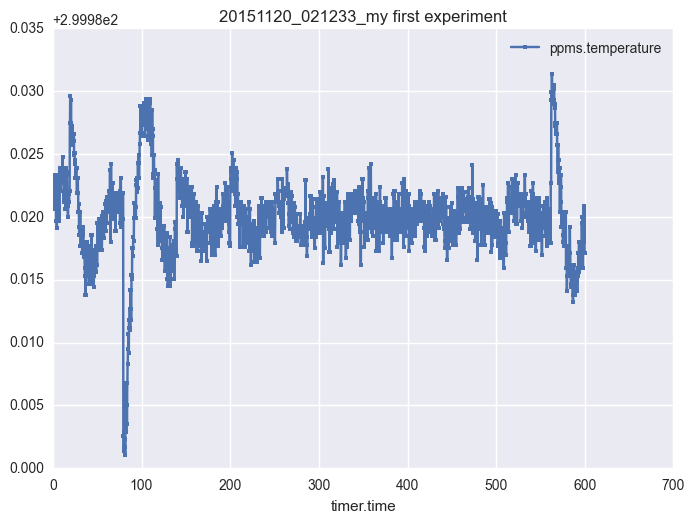

In [25]:
test.clear_plot()
test.plot('timer.time', 'ppms.temperature', style='.-')
while test.running:
    test.update_plot()

In [26]:
cooldown = squidpy.RemoteExperiment(s, 'cooldown')
cooldown.sweep('timer.time')[0:45*60:.2]
cooldown.measure({'timer': ['time'],
              'keithleynano': ['voltage'],
              'ppms': ['temperature', 'field']})
instruments.ppms.temperature = 10
cooldown.run()

In [34]:
cooldown.restart_datacollector()

In [61]:
cooldown.running

True

In [70]:
import pylab as pl

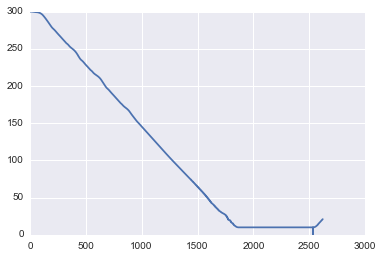

In [117]:
pl.plot(data['timer.time'], data['ppms.temperature'])

In [47]:
cooldown.stamp

'20151120_021731'

In [78]:
cooldown.running

False

In [51]:
instruments.ppms.temperature = 300

In [120]:
s.sendall(b'end')
s.close()